# Import the data


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, recall_score, confusion_matrix, roc_auc_score, classification_report


SEED = 42

cancer = load_breast_cancer()
df =  pd.DataFrame(cancer.data, columns=[cancer.feature_names])
df['target'] = cancer.target
X = df.drop('target', axis=1)
y = cancer.target

<ipython-input-22-a0a87fc810d6>:34: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop('target', axis=1)


# Task 1

In [23]:
#a)
# Dataset size
print(f"Size: {df.shape}")

# Dataset description
print(cancer.DESCR)
# This description above actually answers a lot of the questions about missing values and statistical properties of the data

# Check for null values
print(df.isnull().sum())

# First five rows
print(df.head())

# Statistical properties
print(df.describe())

#b)
# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

#c)
# Split the dataset using an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=SEED)

Size: (569, 31)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst

# Task 2 - SVM model

### Grid Search for rbf kernel ###

# Tuning hyper-parameters for recall

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.0034, 'kernel': 'rbf'}

0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.518 (+/-0.022) for {'C': 1, 'gamma': 0.0012000000000000001, 'kernel': 'rbf'}
0.778 (+/-0.080) for {'C': 1, 'gamma': 0.0023, 'kernel': 'rbf'}
0.875 (+/-0.052) for {'C': 1, 'gamma': 0.0034, 'kernel': 'rbf'}
0.909 (+/-0.048) for {'C': 1, 'gamma': 0.0045000000000000005, 'kernel': 'rbf'}
0.919 (+/-0.042) for {'C': 1, 'gamma': 0.005600000000000001, 'kernel': 'rbf'}
0.925 (+/-0.039) for {'C': 1, 'gamma': 0.0067, 'kernel': 'rbf'}
0.925 (+/-0.039) for {'C': 1, 'gamma': 0.0078000000000000005, 'kernel': 'rbf'}
0.926 (+/-0.050) for {'C': 1, 'gamma': 0.0089, 'kernel': 'rbf'}
0.925 (+/-0.039) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.532 (+/-0.071) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.923 (+/-0.037) for {'C': 10, 'gamma': 0.0012000000000000001, 'kernel'

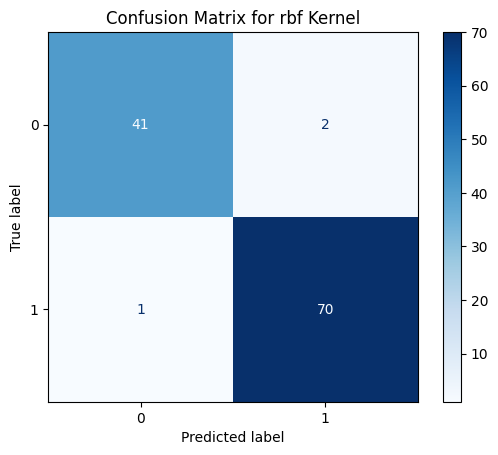

AUC: 0.997
Precision: 0.974
Recall: 0.970

Training F1-Score: 0.981
Test F1-Score: 0.972
Training Recall: 0.981
Test Recall: 0.970
# Tuning hyper-parameters for f1

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.0034, 'kernel': 'rbf'}

0.386 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.423 (+/-0.048) for {'C': 1, 'gamma': 0.0012000000000000001, 'kernel': 'rbf'}
0.798 (+/-0.088) for {'C': 1, 'gamma': 0.0023, 'kernel': 'rbf'}
0.893 (+/-0.046) for {'C': 1, 'gamma': 0.0034, 'kernel': 'rbf'}
0.922 (+/-0.041) for {'C': 1, 'gamma': 0.0045000000000000005, 'kernel': 'rbf'}
0.930 (+/-0.037) for {'C': 1, 'gamma': 0.005600000000000001, 'kernel': 'rbf'}
0.935 (+/-0.034) for {'C': 1, 'gamma': 0.0067, 'kernel': 'rbf'}
0.935 (+/-0.034) for {'C': 1, 'gamma': 0.0078000000000000005, 'kernel': 'rbf'}
0.935 (+/-0.046) for {'C': 1, 'gamma': 0.0089, 'kernel': 'rbf'}
0.935 (+/-0.034) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.359 (+/-0.130) for {'C': 10, 'gamma': 0.000

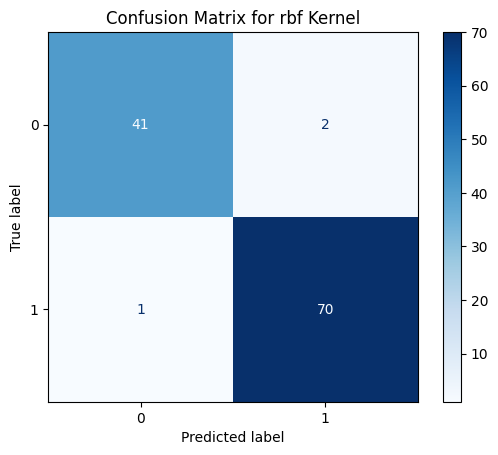

AUC: 0.997
Precision: 0.974
Recall: 0.970

Training F1-Score: 0.981
Test F1-Score: 0.972
Training Recall: 0.981
Test Recall: 0.970
### Grid Search for linear kernel ###

# Tuning hyper-parameters for recall

Best parameters set found on development set:
{'C': 10, 'kernel': 'linear'}

0.971 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.027) for {'C': 10, 'kernel': 'linear'}
0.970 (+/-0.038) for {'C': 100, 'kernel': 'linear'}
0.958 (+/-0.044) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Metrics for the linear kernel with its best hyperparameters:


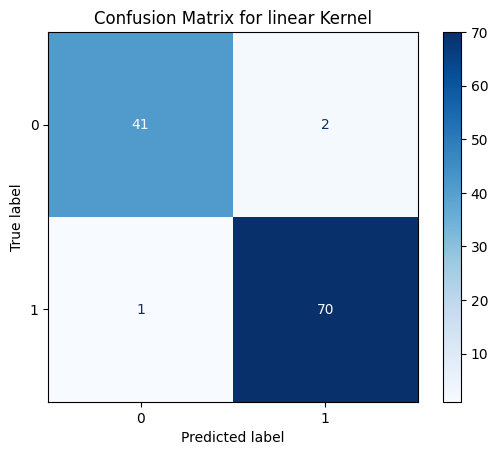

AUC: 0.997
Precision: 0.974
Recall: 0.970

Training F1-Score: 0.986
Test F1-Score: 0.972
Training Recall: 0.986
Test Recall: 0.970
# Tuning hyper-parameters for f1

Best parameters set found on development set:
{'C': 10, 'kernel': 'linear'}

0.972 (+/-0.032) for {'C': 1, 'kernel': 'linear'}
0.977 (+/-0.030) for {'C': 10, 'kernel': 'linear'}
0.969 (+/-0.035) for {'C': 100, 'kernel': 'linear'}
0.958 (+/-0.044) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Metrics for the linear kernel with its best hyperparameters:


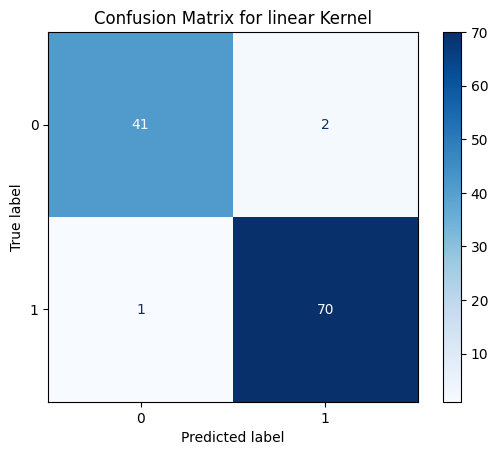

AUC: 0.997
Precision: 0.974
Recall: 0.970

Training F1-Score: 0.986
Test F1-Score: 0.972
Training Recall: 0.986
Test Recall: 0.970
### Grid Search for poly kernel ###

# Tuning hyper-parameters for recall

Best parameters set found on development set:
{'C': 1, 'degree': 2, 'kernel': 'poly'}

0.974 (+/-0.040) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.963 (+/-0.049) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.968 (+/-0.045) for {'C': 1, 'degree': 4, 'kernel': 'poly'}
0.950 (+/-0.034) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.963 (+/-0.038) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.959 (+/-0.028) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.944 (+/-0.036) for {'C': 10, 'degree': 4, 'kernel': 'poly'}
0.940 (+/-0.039) for {'C': 10, 'degree': 5, 'kernel': 'poly'}
0.961 (+/-0.032) for {'C': 100, 'degree': 2, 'kernel': 'poly'}
0.951 (+/-0.033) for {'C': 100, 'degree': 3, 'kernel': 'poly'}
0.944 (+/-0.036) for {'C': 100, 'degree': 4, 'kernel': 'poly'}
0.940 (+/-0.039) for {'C':

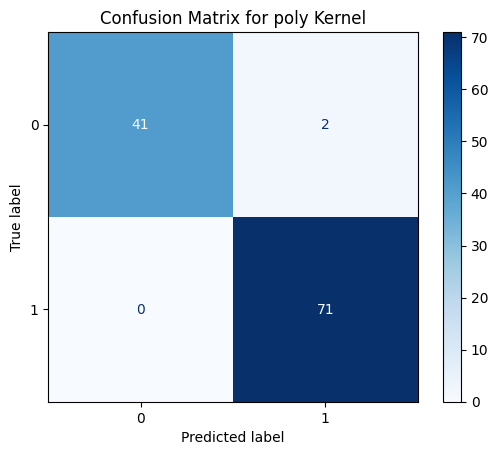

AUC: 0.997
Precision: 0.986
Recall: 0.977

Training F1-Score: 0.983
Test F1-Score: 0.981
Training Recall: 0.982
Test Recall: 0.977
# Tuning hyper-parameters for f1

Best parameters set found on development set:
{'C': 1, 'degree': 2, 'kernel': 'poly'}

0.974 (+/-0.038) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.964 (+/-0.043) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.971 (+/-0.036) for {'C': 1, 'degree': 4, 'kernel': 'poly'}
0.950 (+/-0.019) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.964 (+/-0.034) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.958 (+/-0.020) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.944 (+/-0.035) for {'C': 10, 'degree': 4, 'kernel': 'poly'}
0.939 (+/-0.040) for {'C': 10, 'degree': 5, 'kernel': 'poly'}
0.960 (+/-0.028) for {'C': 100, 'degree': 2, 'kernel': 'poly'}
0.951 (+/-0.031) for {'C': 100, 'degree': 3, 'kernel': 'poly'}
0.944 (+/-0.035) for {'C': 100, 'degree': 4, 'kernel': 'poly'}
0.939 (+/-0.040) for {'C': 100, 'degree': 5, 'kernel': 'poly'}
0.95

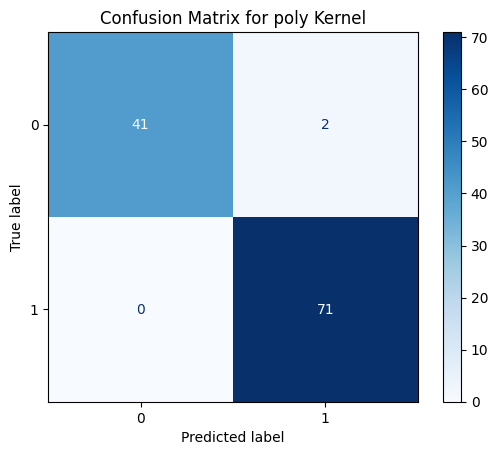

AUC: 0.997
Precision: 0.986
Recall: 0.977

Training F1-Score: 0.983
Test F1-Score: 0.981
Training Recall: 0.982
Test Recall: 0.977
The best kernel is: rbf
The best score is: 0.9795238603608413
The best SVM model is: SVC(C=1000, class_weight='balanced', gamma=0.0034, probability=True,
    random_state=42)
Although the training scores are higher than the test scores the difference is minimal so overfitting doesn't seem to be an issue}


In [24]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
#In this exercise I'm assuming you wanted me to tune the hyperparameters for each kernel

# Create variables that will hold the best model
best_score = -np.inf
best_svm = None
best_kernel = None

# Define gamma range and parameters for each kernel
gamma_vector = np.linspace(1e-4, 1e-2, num=10)

kernel_parameters = {
    'rbf': {'kernel': ['rbf'], 'gamma': gamma_vector, 'C': [1, 10, 100, 1000]},
    'linear': {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    'poly': {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}
}

# Metrics to evaluate
scores = ['recall', 'f1']

# Loop over kernels
for kernel, params in kernel_parameters.items():
    print(f"### Grid Search for {kernel} kernel ###\n")

    # Loop over scoring metrics
    for score in scores:
        print(f"# Tuning hyper-parameters for {score}\n")

        # Grid search with macro-averaged scoring because the sample is slightly imbalanced
        clf = GridSearchCV(
            SVC(class_weight='balanced', probability=True, random_state=SEED),
            [params],
            scoring=f'{score}_macro',
            cv=5
        )

        # Train the model
        clf.fit(X_train, y_train)

        # Print best parameters
        print("Best parameters set found on development set:")
        print(clf.best_params_)
        print()

        # Print grid scores
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, param in zip(means, stds, clf.cv_results_['params']):
            print(f"{mean:.3f} (+/-{std * 2:.03f}) for {param}")
        print()

        # Evaluate the model on the test set
        print("Detailed classification report:")
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()

        # Compute and display metrics for the best hyperparameters
        print(f"Metrics for the {kernel} kernel with its best hyperparameters:")
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot(cmap='Blues')
        plt.title(f"Confusion Matrix for {kernel} Kernel")
        plt.show()

        # Calculate and print AUC, precision, and recall
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        print(f"AUC: {auc:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print()

        # Check for overfitting
        train_score = f1_score(y_train, clf.predict(X_train), average='macro')
        test_score = f1_score(y_test, clf.predict(X_test), average='macro')
        print(f"Training F1-Score: {train_score:.3f}")
        print(f"Test F1-Score: {test_score:.3f}")
        train_score = recall_score(y_train, clf.predict(X_train), average='macro')
        test_score = recall_score(y_test, clf.predict(X_test), average='macro')
        print(f"Training Recall: {train_score:.3f}")
        print(f"Test Recall: {test_score:.3f}")


        # Track the best model based on the current score
        if clf.best_score_ > best_score:
            best_score = clf.best_score_
            best_svm = clf.best_estimator_
            best_kernel = kernel

print(f"The best kernel is: {best_kernel}")
print(f"The best score is: {best_score}")
print(f"The best SVM model is: {best_svm}")
print("Although the training scores are higher than the test scores the difference is minimal so overfitting doesn't seem to be an issue}")


# Task 2 - Decision Trees

Best hyperparameters for Decision Tree:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


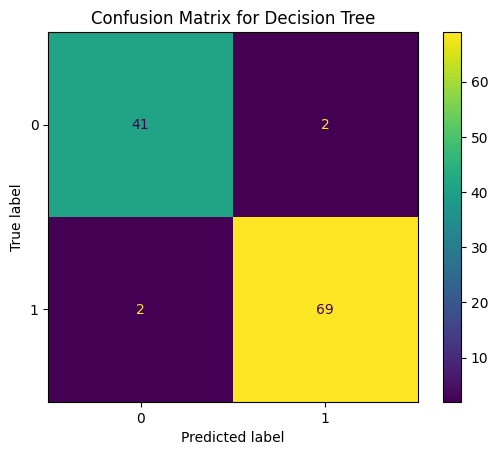

AUC Score for Decision Tree: 0.970
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Decision Tree (Best Parameters) - Train F1: 0.967
Decision Tree (Best Parameters) - Test F1: 0.963
Decision Tree (Best Parameters) - Train Recall: 0.972
Decision Tree (Best Parameters) - Test Recall: 0.963
Although the scores are higher for the training data the difference is very small


In [25]:
# Set up a decision tree classifier
dt = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")
dt.fit(X_train, y_train)

# Define hyperparameters to optimize
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Metrics to evaluate
scores = ['recall', 'f1']

# Perform grid Search
clf = GridSearchCV(
    DecisionTreeClassifier(random_state=SEED, class_weight="balanced"),
    param_grid,
    scoring=f'{score}_macro',
    cv=5
)
clf.fit(X_train, y_train)

# Print best parameters
print("Best hyperparameters for Decision Tree:")
print(clf.best_params_)

# Best model
best_dt = clf.best_estimator_

# Predictions and probabilities
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score for Decision Tree: {auc:.3f}")

# Precision and Recall
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predictions for training and test sets
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# F1-Score
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Decision Tree (Best Parameters) - Train F1: {train_f1:.3f}")
print(f"Decision Tree (Best Parameters) - Test F1: {test_f1:.3f}")

# Recall
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Decision Tree (Best Parameters) - Train Recall: {train_recall:.3f}")
print(f"Decision Tree (Best Parameters) - Test Recall: {test_recall:.3f}")

print("Although the scores are higher for the training data the difference is very small")


# Task 3 - Random Forest

Best hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


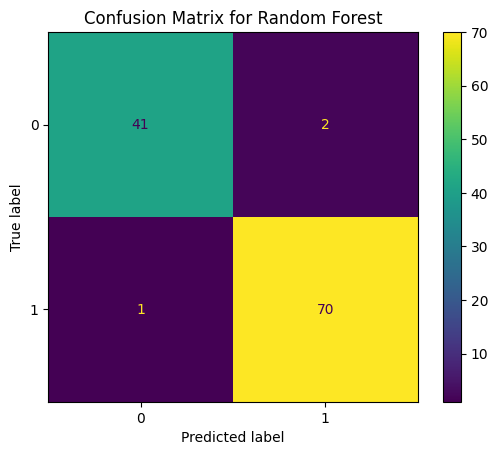

AUC Score for Random Forest: 0.999
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest (Best Parameters) - Train F1: 0.967
Random Forest (Best Parameters) - Test F1: 0.963
Random Forest (Best Parameters) - Train Recall: 0.972
Random Forest (Best Parameters) - Test Recall: 0.963
Once again, although the scores are higher for the training data the difference is very small


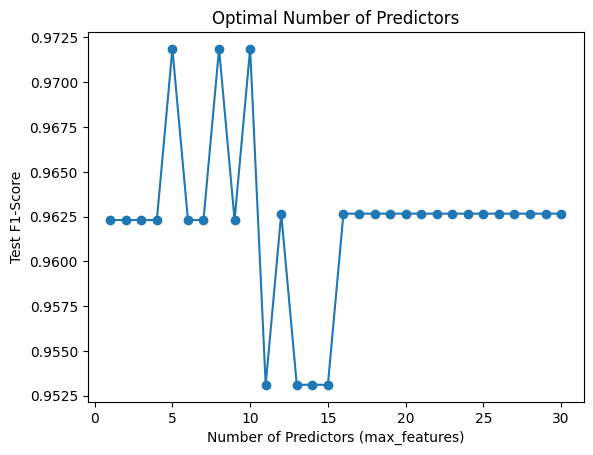

Optimal number of predictors (max_features): 5
Feature Importances:
('worst area',): 0.145
('worst concave points',): 0.123
('mean concave points',): 0.115
('worst perimeter',): 0.090
('worst radius',): 0.080
('mean concavity',): 0.072
('mean area',): 0.055
('mean radius',): 0.050
('mean perimeter',): 0.047
('worst concavity',): 0.037
('area error',): 0.027
('worst texture',): 0.018
('worst compactness',): 0.016
('radius error',): 0.016
('mean texture',): 0.015
('mean compactness',): 0.015
('worst smoothness',): 0.011
('perimeter error',): 0.009
('worst symmetry',): 0.008
('mean smoothness',): 0.007
('concavity error',): 0.006
('worst fractal dimension',): 0.006
('smoothness error',): 0.005
('compactness error',): 0.005
('texture error',): 0.005
('mean fractal dimension',): 0.004
('mean symmetry',): 0.003
('fractal dimension error',): 0.003
('concave points error',): 0.003
('symmetry error',): 0.003


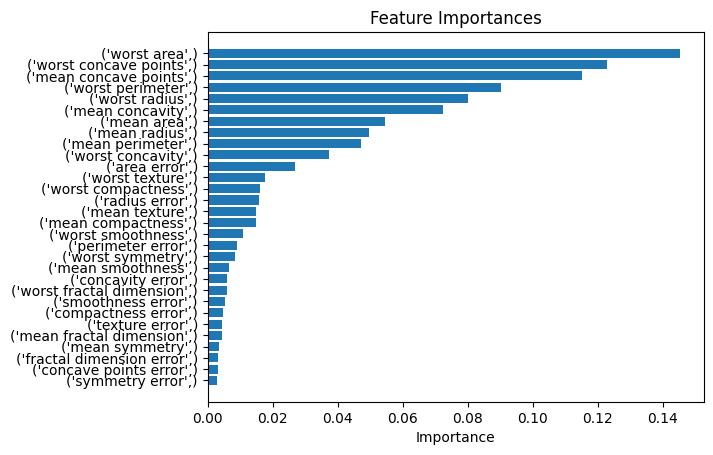

In [26]:
# Set up the random forest model
rf = RandomForestClassifier(random_state=SEED, class_weight="balanced")
rf.fit(X_train, y_train)


# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], #number of trees
    'max_depth': [None, 10, 20, 30], #maximum depth of each split
    'min_samples_split': [2, 5, 10], # min samples required to split a node
    'min_samples_leaf': [1, 2, 4] # min samples required at a leaf node
}

# Perform Grid Search
clf = GridSearchCV(
    RandomForestClassifier(random_state=SEED, class_weight="balanced"),
    param_grid,
    scoring=f'{score}_macro',
    cv=5
)
clf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Random Forest:")
print(clf.best_params_)

# Best model
best_rf = clf.best_estimator_

# Predictions and probabilities
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score for Random Forest: {auc:.3f}")

# Precision and Recall
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predictions for training and test sets
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# F1-Score
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Random Forest (Best Parameters) - Train F1: {train_f1:.3f}")
print(f"Random Forest (Best Parameters) - Test F1: {test_f1:.3f}")

# Recall
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Random Forest (Best Parameters) - Train Recall: {train_recall:.3f}")
print(f"Random Forest (Best Parameters) - Test Recall: {test_recall:.3f}")

print("Once again, although the scores are higher for the training data the difference is very small")
# Range of max_features
max_features_range = np.arange(1, X_train.shape[1] + 1)

# Evaluate model performance for each max_features
scores = []
for max_features in max_features_range:
    rf = RandomForestClassifier(
        random_state=SEED,
        class_weight="balanced",
        n_estimators=100,
        max_features=max_features
    )
    rf.fit(X_train, y_train)

    # Use F1-Score
    f1 = f1_score(y_test, rf.predict(X_test), average='macro')
    scores.append(f1)

# Plot results
plt.plot(max_features_range, scores, marker='o')
plt.xlabel("Number of Predictors (max_features)")
plt.ylabel("Test F1-Score")
plt.title("Optimal Number of Predictors")
plt.show()

# Optimal number of predictors
optimal_predictors = max_features_range[np.argmax(scores)]
print(f"Optimal number of predictors (max_features): {optimal_predictors}")

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Display top features
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.3f}")

# Plot feature importances
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), np.array(feature_names)[sorted_indices])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# Task 4 - Voting classifier

Voting Classifier - Train F1-Score: 0.988
Voting Classifier - Test F1-Score: 0.981
Voting Classifier - Train Recall: 0.988
Voting Classifier - Test Recall: 0.977


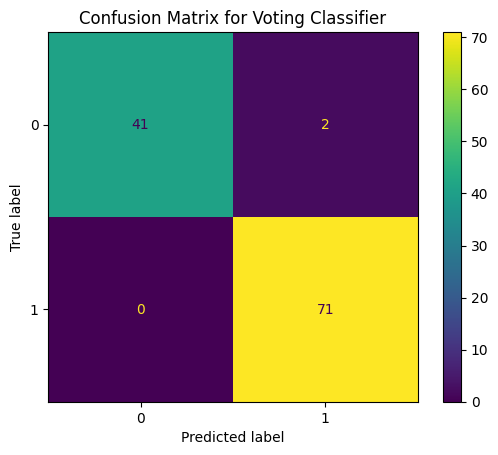

AUC Score for Voting Classifier: 0.998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [27]:
# Combine the best models
voting_clf = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('decision_tree', best_dt),
        ('random_forest', best_rf)
    ],
    voting='soft'  # Use 'soft' voting for probabilities
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate on training data
# Predictions for training and test sets
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# F1-Score
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Voting Classifier - Train F1-Score: {train_f1:.3f}")
print(f"Voting Classifier - Test F1-Score: {test_f1:.3f}")

# Recall
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
print(f"Voting Classifier - Train Recall: {train_recall:.3f}")
print(f"Voting Classifier - Test Recall: {test_recall:.3f}")

# Predictions and probabilities
y_pred = voting_clf.predict(X_test)
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix for Voting Classifier")
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score for Voting Classifier: {auc:.3f}")

# Precision and Recall
print("Classification Report:")
print(classification_report(y_test, y_pred))
